### Just reference (Not Final)

In [54]:
# import numpy as np
# import matplotlib.pyplot as plt
# from filterpy.kalman import KalmanFilter

# # Read the ASCII file
# file_path = "/Users/ravitejakunchanapalli/Downloads/org_BESTPOS.ASCII"
# with open(file_path, 'r') as file:
#     data = file.readlines()
         
# # Initialize lists to store parsed data
# latitudes = []
# longitudes = []

# # Iterate through each line in the file
# for line in data:
#     # Split the line into log header and fields
#     log_header, fields = line.split(';')
    
#     # Split the fields into individual data points
#     fields = fields.split(',')
    
#     # Extract latitude, longitude, and their standard deviations
#     latitudes.append(float(fields[2]))
#     longitudes.append(float(fields[3]))

# # Define system matrices and initial conditions
# A = np.eye(2)  # Identity matrix, assuming a simple motion model
# B = np.zeros((2, 2))  # No control input
# H = np.eye(2)  # Identity matrix as we directly observe position
# Q = np.eye(2) * 0.01  # Process noise covariance
# R = np.eye(2) * 0.001  # Measurement noise covariance
# initial_state = np.array([latitudes[0], longitudes[0]])  # Initial position
# initial_covariance = np.eye(2)  # Initial covariance matrix

# # Create Kalman filter object
# kf = KalmanFilter(dim_x=2, dim_z=2)
# kf.x = initial_state
# kf.P = initial_covariance
# kf.F = A
# kf.H = H
# kf.Q = Q
# kf.R = R

# # Lists to store original and estimated data
# original_latitudes = []
# original_longitudes = []
# estimated_latitudes = []
# estimated_longitudes = []

# # Perform filtering for each measurement
# for latitude, longitude in zip(latitudes, longitudes):
#     measurement = np.array([[latitude], [longitude]])
#     kf.predict()
#     kf.update(measurement)
    
#     # Append original and estimated data
#     original_latitudes.append(latitude)
#     original_longitudes.append(longitude)
#     estimated_latitudes.append(kf.x[0])
#     estimated_longitudes.append(kf.x[1])

# # Plotting
# plt.figure(figsize=(10, 6))
# plt.plot(original_longitudes,original_latitudes,  'b', label='Original Data', color='blue')
# plt.plot(estimated_longitudes,estimated_latitudes,  'r', label='Estimated Data', color='red')
# plt.ylabel('Latitude')
# plt.xlabel('Longitude')
# plt.title('Original vs. Estimated Data')
# plt.legend()
# plt.grid(True)
# plt.show()


## Distance and error Calculation

In [55]:
import numpy as np

def lat_lon_to_meters(lat, lon):
    # Approximate conversion factors for latitude and longitude (for small differences)
    lat_to_m = 111320  # Approximately 111 km per degree latitude
    lon_to_m = 111320  # Approximately 111 km per degree longitude at the equator
    
    # Convert latitude and longitude to meters
    lat_meters = np.array(lat) * lat_to_m
    lon_meters = np.array(lon) * lon_to_m * np.cos(np.radians(lat))
    
    return lat_meters, lon_meters

def calculate_error(original, estimated):
    return np.array(original) - np.array(estimated)

## Reading the  data from the file

In [56]:
import matplotlib.pyplot as plt
from filterpy.kalman import KalmanFilter
from scipy.linalg import block_diag
from filterpy.kalman import UnscentedKalmanFilter as UKF
from filterpy.kalman import MerweScaledSigmaPoints
from filterpy.kalman import ExtendedKalmanFilter
# Read the ASCII file
file_path = "/Users/ravitejakunchanapalli/Downloads/NO RTK NMUS22160001B_2024-02-15_12-07-25_BESTGNSSPOS.ASCII"
with open(file_path, 'r') as file:
    data = file.readlines()

# Initialize lists to store parsed data
latitudes = []
longitudes = []

# Iterate through each line in the file
for line in data:
    # Split the line into log header and fields
    log_header, fields = line.split(';')
    
    # Split the fields into individual data points
    fields = fields.split(',')
    
    # Extract latitude, longitude, and their standard deviations
    lat = float(fields[2])
    lon = float(fields[3])
    latitudes.append(lat)
    longitudes.append(lon)

## Kalman Filter code

lat_std_kal 2.7724433177137184
lon_std_kal 1.4906846919789993


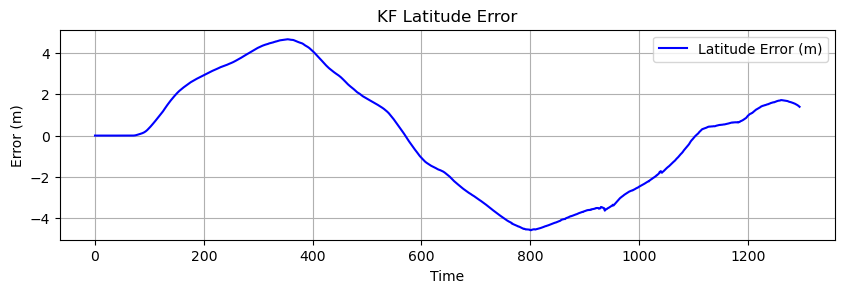

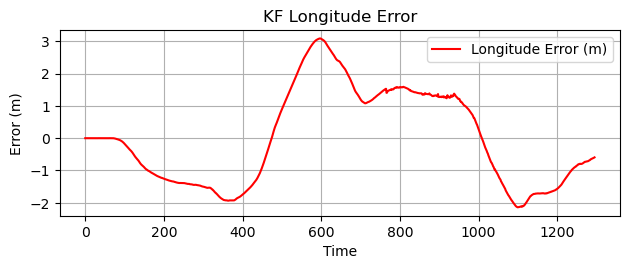

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


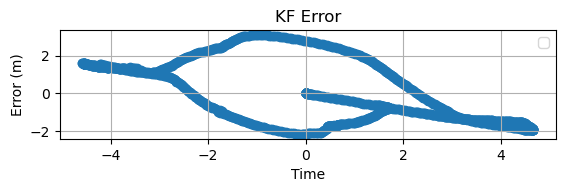

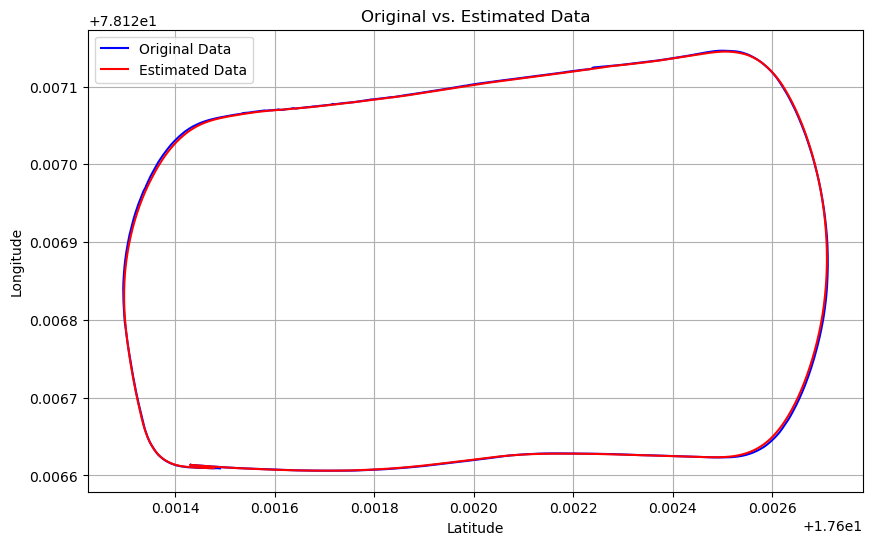

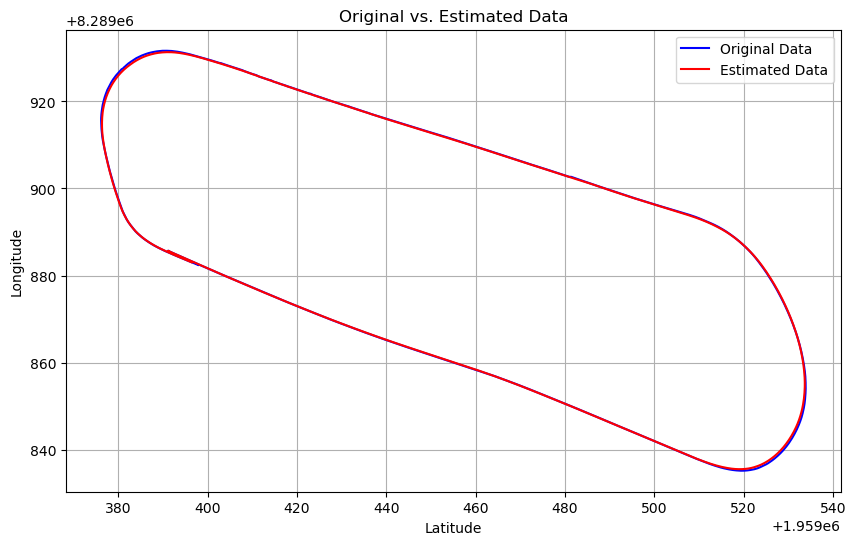

In [71]:

# Initialize the Kalman filter
kf = KalmanFilter(dim_x=2, dim_z=2)

# Define the state transition matrix
kf.F = np.array([[1., 0.],
                 [0., 1.]])

# Define the measurement matrix
kf.H = np.array([[1., 0.],
                 [0., 1.]])

# Initialize the state covariance matrix
kf.P = np.diag([1, 1])

# Initialize the measurement covariance matrix
kf.R = np.diag([1,0.7])

# Initialize the process noise covariance matrix
kf.Q = np.diag([0.01, 0.01])

# Initialize the state vector
kf.x = np.array([[latitudes[0]], [longitudes[0]]])

# Apply the Kalman filter to the latitude and longitude data
filtered_states = []
for measurement in zip(latitudes, longitudes):
    kf.predict()
    kf.update(np.array(measurement))
    filtered_states.append(kf.x)

# Extract filtered latitudes and longitudes
filtered_latitudes_kf = [state[0, 0] for state in filtered_states]
filtered_longitudes_kf = [state[1, 0] for state in filtered_states]

# Assuming you have defined filtered_latitudes_kf and filtered_longitudes_kf
# Convert original and estimated coordinates to meters
original_latitudes_meters_kf, original_longitudes_meters_kf = lat_lon_to_meters(latitudes, longitudes)
estimated_latitudes_meters_kf, estimated_longitudes_meters_kf = lat_lon_to_meters(filtered_latitudes_kf, filtered_longitudes_kf)

# Calculate error in meters
lat_error_kf = calculate_error(original_latitudes_meters_kf,estimated_latitudes_meters_kf)
lon_error_kf = calculate_error(original_longitudes_meters_kf,estimated_longitudes_meters_kf)

lat_std_kal=np.std(lat_error_kf)
lon_std_kal=np.std(lon_error_kf)

print("lat_std_kal",lat_std_kal)
print("lon_std_kal",lon_std_kal)


# Plot Kalman filter error
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(lat_error_kf, label='Latitude Error (m)', color='blue')
plt.xlabel('Time')
plt.ylabel('Error (m)')
plt.title('KF Latitude Error')
plt.legend()
plt.grid(True)
plt.show()

plt.subplot(2, 1, 2)
plt.plot(lon_error_kf, label='Longitude Error (m)', color='red')
plt.xlabel('Time')
plt.ylabel('Error (m)')
plt.title('KF Longitude Error')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



# Plot Kalman filter error
plt.subplot(3, 1, 3)
plt.scatter(lat_error_kf, lon_error_kf)
plt.xlabel('Time')
plt.ylabel('Error (m)')
plt.title('KF Error')
plt.legend()
plt.grid(True)
plt.show()




# Plot the original and estimated data
plt.figure(figsize=(10, 6))
plt.plot(latitudes, longitudes, 'b', label='Original Data')
plt.plot(filtered_latitudes_kf, filtered_longitudes_kf, 'r',label='Estimated Data')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Original vs. Estimated Data')
plt.legend()
plt.grid(True)
plt.show()



# Plot the original and estimated data
plt.figure(figsize=(10, 6))
plt.plot(original_latitudes_meters_kf, original_longitudes_meters_kf, 'b', label='Original Data')
plt.plot(estimated_latitudes_meters_kf,estimated_longitudes_meters_kf, 'r',label='Estimated Data')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Original vs. Estimated Data')
plt.legend()
plt.grid(True)
plt.show()





## Using time and distance(EKF)

In [58]:
# import numpy as np
# import matplotlib.pyplot as plt
# from filterpy.kalman import ExtendedKalmanFilter
# from datetime import datetime, timedelta

# def gps_to_unix(week, towc):
#     gps_epoch = datetime(1980, 1, 6)  # start of GPS time
#     leap_seconds = 18  # replace with the current number of leap seconds
#     elapsed = timedelta(weeks=week, seconds=towc - leap_seconds)
#     unix_time = (gps_epoch + elapsed - datetime(1970, 1, 1)).total_seconds()
#     return unix_time

# # Read the ASCII file and extract relevant fields
# file_path = "/Users/ravitejakunchanapalli/Downloads/org_BESTPOS.ASCII"
# with open(file_path, 'r') as file:
#     data = file.readlines()

# # Initialize lists to store parsed data
# latitudes = []
# longitudes = []
# heights = []
# unix_times = [] 

# # Iterate through each line in the file
# for line in data:
#     # Split the line into log header and fields
#     log_header, fields = line.split(';')
#     log_header = log_header.split(',')
#     week = int(log_header[5])  # Assuming GPS week is at index 5
#     towc = float(log_header[6])  # Assuming time of ephemeris is at index 6
#     # Split the fields into individual data points
#     fields = fields.split(',')

#     # Extracting relevant data (latitude, longitude, and height)
#     lat = float(fields[2])
#     lon = float(fields[3])
#     hgt = float(fields[4])
    
#     # Convert GPS week and time of ephemeris to Unix time
#     unix_time = gps_to_unix(week, towc)

#     # Store the parsed data in lists
#     latitudes.append(lat)
#     longitudes.append(lon)
#     heights.append(hgt)
#     unix_times.append(unix_time)

# # Calculate displacements between consecutive points
# delta_latitudes = np.diff(latitudes)
# delta_longitudes = np.diff(longitudes)

# # Calculate time intervals between consecutive points
# time_intervals = np.diff(unix_times)

# # Calculate velocities (instantaneous velocities)
# # Velocity = Displacement / Time
# velocities = np.sqrt(delta_latitudes**2 + delta_longitudes**2) / time_intervals

# # Assuming constant velocity, use the mean velocity as estimated velocity
# estimated_velocity = np.mean(velocities)

# # Define the state transition function
# def f(x, dt):
#     # Assuming a constant velocity model
#     return x + estimated_velocity * dt

# # Define the measurement function
# def h(x):
#     return x

# # Define the Jacobian of the measurement function
# def HJacobian(x):
#     return np.eye(2)  # Identity matrix since measurement function is identity

# # Initialize the Extended Kalman Filter
# kf = ExtendedKalmanFilter(dim_x=2, dim_z=2)

# # Set the state transition function and measurement function for the filter
# kf.x = np.array([latitudes[0], longitudes[0]])
# kf.F = np.eye(2)  # State transition matrix
# kf.H = np.eye(2)  # Measurement matrix

# # Initialize the state covariance matrix
# kf.P *= 1000.0

# # Initialize the measurement covariance matrix
# kf.R = np.diag([0.001, 0.001])

# # Initialize the process noise covariance matrix
# kf.Q = np.diag([0.01, 0.01])

# # Initialize the time step
# dt = 1.0

# # Apply the Extended Kalman Filter to the latitude and longitude data
# filtered_states = []
# for i in range(1, len(latitudes)):
#     # Predict step using the state transition function
#     kf.predict()

#     # Update step
#     measurement = np.array([latitudes[i], longitudes[i]])
#     kf.update(measurement, HJacobian=HJacobian, Hx=h)
    
#     filtered_states.append(kf.x)

# # Extract filtered latitudes and longitudes
# filtered_latitudes_ekf = [state[0] for state in filtered_states]
# filtered_longitudes_ekf = [state[1] for state in filtered_states]

# # Convert original and estimated coordinates to meters
# original_latitudes_meters_ekf, original_longitudes_meters_ekf = lat_lon_to_meters(latitudes, longitudes)
# estimated_latitudes_meters_ekf, estimated_longitudes_meters_ekf = lat_lon_to_meters(filtered_latitudes_ekf, filtered_longitudes_ekf)

# # Convert NumPy arrays to lists
# estimated_latitudes_meters_ekf = estimated_latitudes_meters_ekf.tolist()

# estimated_longitudes_meters_ekf = estimated_longitudes_meters_ekf.tolist()

# # Add a placeholder value to the estimated latitude list
# estimated_latitudes_meters_ekf.append(estimated_latitudes_meters_ekf[-1])
# estimated_longitudes_meters_ekf.append(estimated_longitudes_meters_ekf[-1])

# # Calculate error in meters
# lat_error_ekf = calculate_error(original_latitudes_meters_ekf, estimated_latitudes_meters_ekf)
# lon_error_ekf = calculate_error(original_longitudes_meters_ekf, estimated_longitudes_meters_ekf)

# # Plot EKF error
# plt.figure(figsize=(10, 6))
# plt.subplot(2, 1, 1)
# plt.plot(lat_error_ekf, label='Latitude Error (m)', color='blue')
# plt.xlabel('Time')
# plt.ylabel('Error (m)')
# plt.title('EKF Latitude Error')
# plt.legend()
# plt.grid(True)
# plt.show()

# plt.subplot(2, 1, 2)
# plt.plot(lon_error_ekf, label='Longitude Error (m)', color='red')
# plt.xlabel('Time')
# plt.ylabel('Error (m)')
# plt.title('EKF Longitude Error')
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()


# # Plot the original and estimated data
# plt.figure(figsize=(10, 6))
# plt.plot(latitudes, longitudes, 'b.', label='Original Data', color='blue')
# plt.plot(filtered_latitudes_ekf, filtered_longitudes_ekf, 'r.', label='Estimated Data', color='red')
# plt.xlabel('Latitude')
# plt.ylabel('Longitude')
# plt.title('Original vs. Estimated Data')
# plt.legend()
# plt.grid(True)
# plt.show()


## Extended kalman filter

In [59]:
# # Define the state transition function
# def f(x, dt):
#     # Assuming a constant velocity model
#     return x

# # Define the measurement function
# def h(x):
#     return x

# # Define the Jacobian of the state transition function
# def F(x, dt):
#     return np.eye(len(x))

# # Define the Jacobian of the measurement function
# def H(x):
#     return np.eye(len(x))

# # Initialize the state vector
# x = np.array([latitudes[0], longitudes[0]])

# # Initialize the state covariance matrix
# P = np.diag([1000.0, 1000.0])

# # Initialize the measurement covariance matrix
# R = np.diag([0.01, 0.01])

# # Initialize the process noise covariance matrix
# Q = np.diag([0.01, 0.01])

# # Initialize the time step
# dt = 1.0

# # Apply the Extended Kalman Filter to the latitude and longitude data
# filtered_states = []
# for measurement in zip(latitudes, longitudes):
#     # Prediction Step
#     x = f(x, dt)
#     Fx = F(x, dt)
#     P = Fx @ P @ Fx.T + Q
    
#     # Update Step
#     y = np.array(measurement) - h(x)
#     Hx = H(x)
#     S = Hx @ P @ Hx.T + R
#     K = P @ Hx.T @ np.linalg.inv(S)
#     x = x + K @ y
#     P = (np.eye(len(x)) - K @ Hx) @ P
    
#     filtered_states.append(x)

# # Extract filtered latitudes and longitudes
# filtered_latitudes_ekf = [state[0] for state in filtered_states]
# filtered_longitudes_ekf= [state[1] for state in filtered_states]



# # Assuming you have defined filtered_latitudes_ekf and filtered_longitudes_ekf
# # Convert original and estimated coordinates to meters
# original_latitudes_meters_ekf, original_longitudes_meters_ekf = lat_lon_to_meters(latitudes, longitudes)
# estimated_latitudes_meters_ekf, estimated_longitudes_meters_ekf = lat_lon_to_meters(filtered_latitudes_ekf, filtered_longitudes_ekf)

# # Calculate error in meters
# lat_error_ekf = calculate_error(original_latitudes_meters_ekf, estimated_latitudes_meters_ekf)
# lon_error_ekf = calculate_error(original_longitudes_meters_ekf, estimated_longitudes_meters_ekf)

# # Plot EKF error
# plt.figure(figsize=(10, 6))
# plt.subplot(2, 1, 1)
# plt.plot(lat_error_ekf, label='Latitude Error (m)', color='blue')
# plt.xlabel('Time')
# plt.ylabel('Error (m)')
# plt.title('EKF Latitude Error')
# plt.legend()
# plt.grid(True)
# plt.show()

# plt.subplot(2, 1, 2)
# plt.plot(lon_error_ekf, label='Longitude Error (m)', color='red')
# plt.xlabel('Time')
# plt.ylabel('Error (m)')
# plt.title('EKF Longitude Error')
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()


# # Plot the original and estimated data
# plt.figure(figsize=(10, 6))
# plt.plot(latitudes, longitudes,  label='Original Data', color='blue')
# plt.plot(filtered_latitudes_ekf, filtered_longitudes_ekf, label='Estimated Data', color='red')
# plt.xlabel('Latitude')
# plt.ylabel('Longitude')
# plt.title('Original vs. Estimated Data')
# plt.legend()
# plt.grid(True)
# plt.show()


## Final EKF

lat_std_ekf 1.0673671406470115
lon_std_ekf 0.6374054613833677


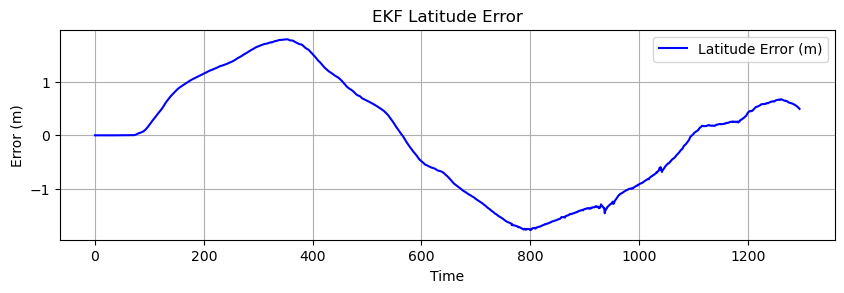

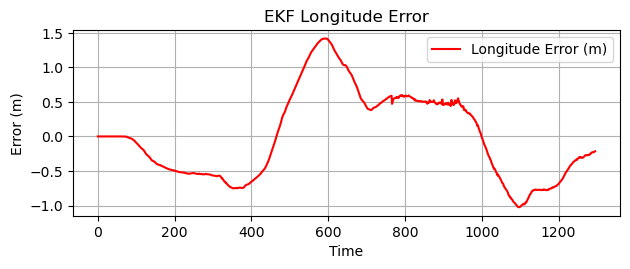

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


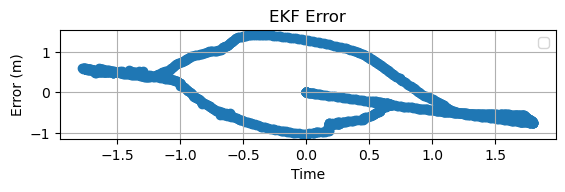

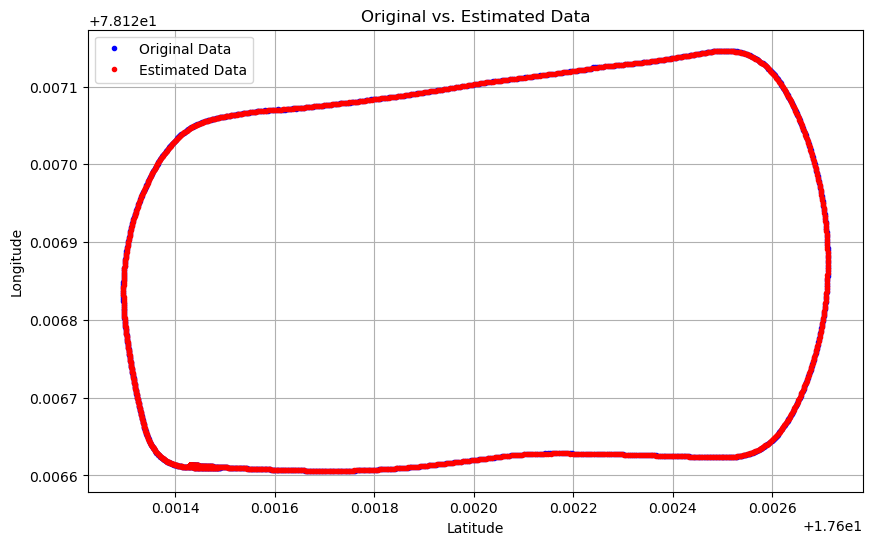

In [60]:
# Define the state transition function
def f(x, dt):
    # Assuming a constant velocity model
    return x

# Define the measurement function
def h(x):
    return x

# Define the Jacobian of the measurement function
def HJacobian(x):
    return np.eye(2)  # Identity matrix since measurement function is identity

# Initialize the Extended Kalman Filter
ekf = ExtendedKalmanFilter(dim_x=2, dim_z=2)

# Set the state transition function and measurement function for the filter
ekf.x = np.array([latitudes[0], longitudes[0]])
ekf.F = np.eye(2)  # State transition matrix
ekf.H = np.eye(2)  # Measurement matrix

# Initialize the state covariance matrix
ekf.P *= 10.0


# Initialize the measurement covariance matrix
ekf.R = np.diag([0.17,0.17])

# Initialize the process noise covariance matrix
ekf.Q = np.diag([0.01, 0.01])

# Initialize the time step
dt = 1.0

# Apply the Extended Kalman Filter to the latitude and longitude data
filtered_states = []
for measurement in zip(latitudes, longitudes):
    ekf.predict()
    
    # Update Step
    ekf.update(np.array(measurement), HJacobian=HJacobian, Hx=h)  
    
    filtered_states.append(ekf.x)

# Extract filtered latitudes and longitudes
filtered_latitudes_ekf= [state[0] for state in filtered_states]
filtered_longitudes_ekf= [state[1] for state in filtered_states]


# Convert original and estimated coordinates to meters
original_latitudes_meters_ekf, original_longitudes_meters_ekf = lat_lon_to_meters(latitudes, longitudes)
estimated_latitudes_meters_ekf, estimated_longitudes_meters_ekf = lat_lon_to_meters(filtered_latitudes_ekf, filtered_longitudes_ekf)

# Calculate error in meters
lat_error_ekf = calculate_error(original_latitudes_meters_ekf, estimated_latitudes_meters_ekf)
lon_error_ekf = calculate_error(original_longitudes_meters_ekf, estimated_longitudes_meters_ekf)

lat_std_ekf=np.std(lat_error_ekf)
lon_std_ekf=np.std(lon_error_ekf)

print("lat_std_ekf",lat_std_ekf)
print("lon_std_ekf",lon_std_ekf)



# Plot EKF error
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(lat_error_ekf, label='Latitude Error (m)', color='blue')
plt.xlabel('Time')
plt.ylabel('Error (m)')
plt.title('EKF Latitude Error')
plt.legend()
plt.grid(True)
plt.show()

plt.subplot(2, 1, 2)
plt.plot(lon_error_ekf, label='Longitude Error (m)', color='red')
plt.xlabel('Time')
plt.ylabel('Error (m)')
plt.title('EKF Longitude Error')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot Kalman filter error
plt.subplot(3, 1, 3)
plt.scatter(lat_error_ekf, lon_error_ekf)
plt.xlabel('Time')
plt.ylabel('Error (m)')
plt.title('EKF Error')
plt.legend()
plt.grid(True)
plt.show()


# Plot the original and estimated data
plt.figure(figsize=(10, 6))
plt.plot(latitudes, longitudes, 'b.', label='Original Data')
plt.plot(filtered_latitudes_ekf, filtered_longitudes_ekf, 'r.', label='Estimated Data')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Original vs. Estimated Data')
plt.legend()
plt.grid(True)
plt.show()

## UKF

lat_std_ukf 1.0673671424265851
lon_std_ukf 0.6374054614322175


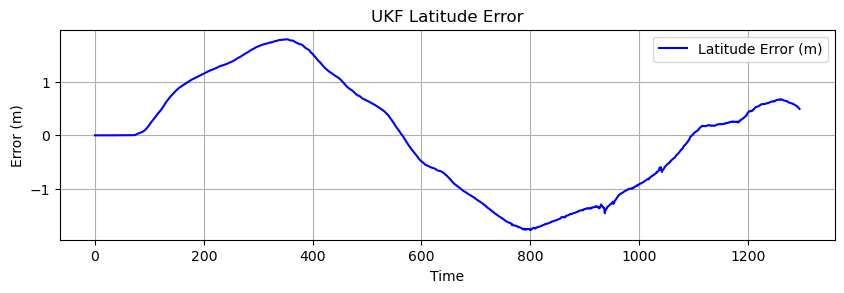

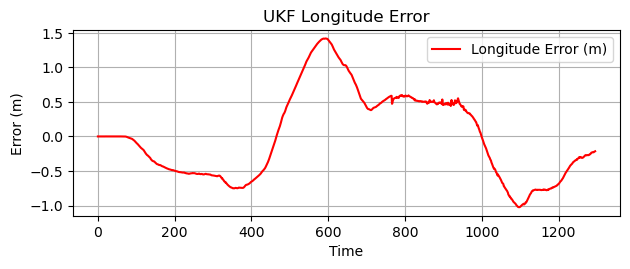

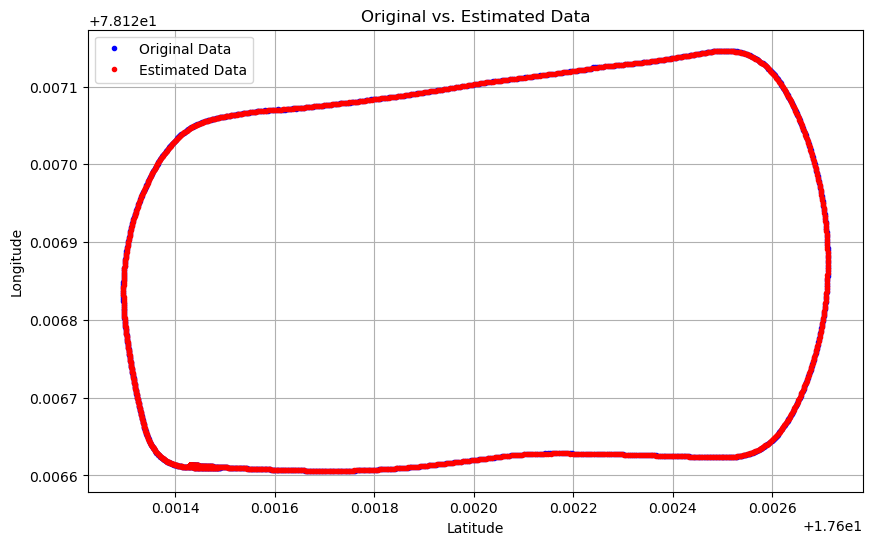

In [61]:
# Define the state transition function
def f(x, dt):
    # Assuming a constant velocity model
    return x

# Define the measurement function
def h(x):
    return x

# Initialize the state vector
x = np.array([latitudes[0], longitudes[0]])

# Initialize the state covariance matrix
P = np.diag([10.0, 10.0])

# Initialize the time step
dt = 1.0

# Define sigma points
points = MerweScaledSigmaPoints(n=2, alpha=0.1, beta=2., kappa=1.)

# Initialize the UKF
ukf = UKF(dim_x=2, dim_z=2, dt=dt, fx=f, hx=h, points=points)

# Set initial state and covariance
ukf.x = x
ukf.P = P

# Set process and measurement noise
# Initialize the measurement covariance matrix
ukf.R = np.diag([0.17,0.17])

# Initialize the process noise covariance matrix
ukf.Q = np.diag([0.01, 0.01])

# Apply the Unscented Kalman Filter to the latitude and longitude data
filtered_states = []
for measurement in zip(latitudes, longitudes):
    ukf.predict()
    ukf.update(measurement)
    filtered_states.append(ukf.x)

# Extract filtered latitudes and longitudes
filtered_latitudes_ukf= [state[0] for state in filtered_states]
filtered_longitudes_ukf= [state[1] for state in filtered_states]

# Convert original and estimated coordinates to meters
original_latitudes_meters_ukf, original_longitudes_meters_ukf = lat_lon_to_meters(latitudes, longitudes)
estimated_latitudes_meters_ukf, estimated_longitudes_meters_ukf = lat_lon_to_meters(filtered_latitudes_ukf, filtered_longitudes_ukf)

# Calculate error in meters
lat_error_ukf = calculate_error(original_latitudes_meters_ukf, estimated_latitudes_meters_ukf)
lon_error_ukf = calculate_error(original_longitudes_meters_ukf, estimated_longitudes_meters_ukf)


lat_std_ukf=np.std(lat_error_ukf)
lon_std_ukf=np.std(lon_error_ukf)

print("lat_std_ukf",lat_std_ukf)
print("lon_std_ukf",lon_std_ukf)


# Plot UKF error
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(lat_error_ukf, label='Latitude Error (m)', color='blue')
plt.xlabel('Time')
plt.ylabel('Error (m)')
plt.title('UKF Latitude Error')
plt.legend()
plt.grid(True)
plt.show()

plt.subplot(2, 1, 2)
plt.plot(lon_error_ukf, label='Longitude Error (m)', color='red')
plt.xlabel('Time')
plt.ylabel('Error (m)')
plt.title('UKF Longitude Error')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot the original and estimated data
plt.figure(figsize=(10, 6))
plt.plot(latitudes, longitudes, 'b.',label='Original Data')
plt.plot(filtered_latitudes_ukf, filtered_longitudes_ukf, 'r.',label='Estimated Data')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Original vs. Estimated Data')
plt.legend()
plt.grid(True)
plt.show()


## MAf(Moving Average Filter )

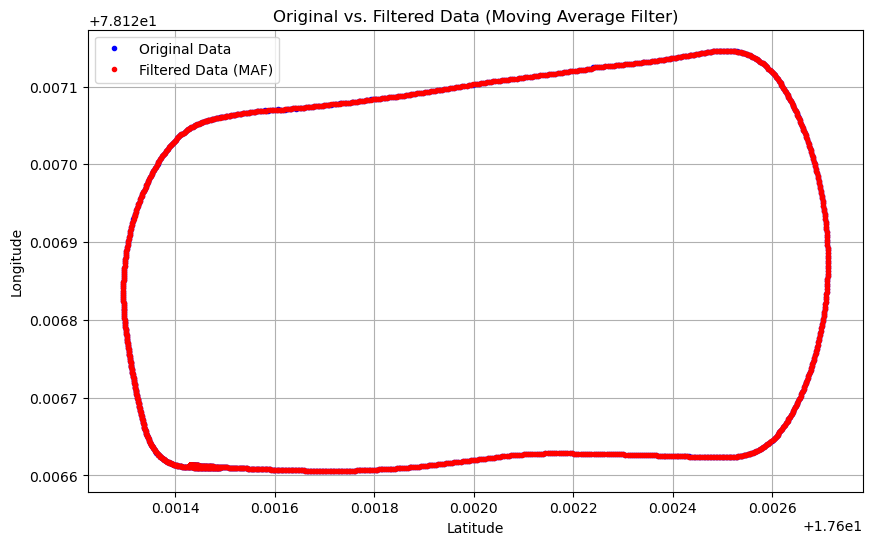

In [62]:
# Define the window size for the moving average filter
window_size = 3

# Apply the Moving Average Filter to the latitude and longitude data
filtered_latitudes_maf= np.convolve(latitudes, np.ones(window_size)/window_size, mode='valid')
filtered_longitudes_maf= np.convolve(longitudes, np.ones(window_size)/window_size, mode='valid')


# Plot the original and filtered data
plt.figure(figsize=(10, 6))
plt.plot(latitudes, longitudes, 'b.', label='Original Data')
plt.plot(filtered_latitudes_maf, filtered_longitudes_maf, 'r.', label='Filtered Data (MAF)')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Original vs. Filtered Data (Moving Average Filter)')
plt.legend()
plt.grid(True)
plt.show()


## Graphs Plotting

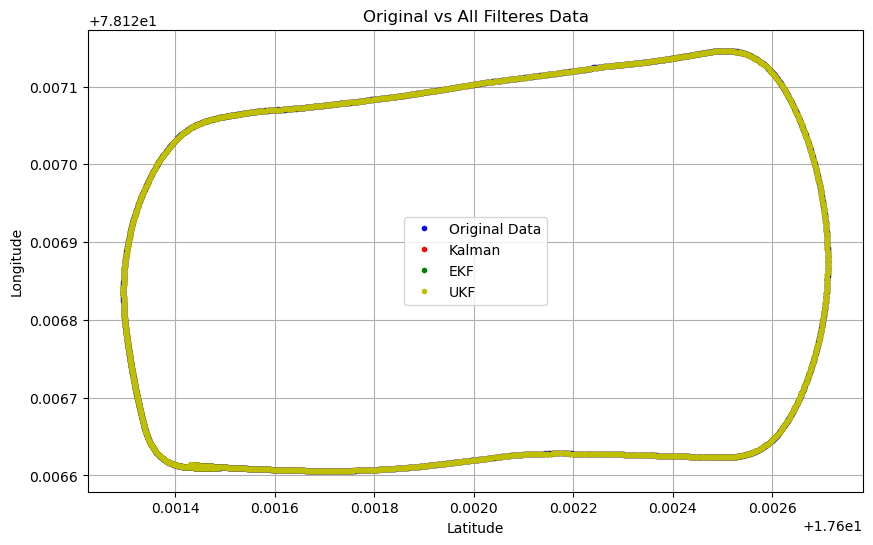

In [63]:
import matplotlib.pyplot as plt
 
# Plot all the filtered data in a single plot with legends
plt.figure(figsize=(10, 6))
plt.plot(latitudes,longitudes,  'b.', label='Original Data')
plt.plot( filtered_latitudes_kf,filtered_longitudes_kf,'r.',label='Kalman')
plt.plot(filtered_latitudes_ekf,filtered_longitudes_ekf,'g.',label='EKF')
plt.plot( filtered_latitudes_ukf,filtered_longitudes_ukf,'y.',label='UKF')
#plt.plot( filtered_latitudes_maf,filtered_longitudes_maf,'m-',label='MAF')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Original vs All Filteres Data')
plt.legend()
plt.grid(True)
plt.show()

## Errors PLotting

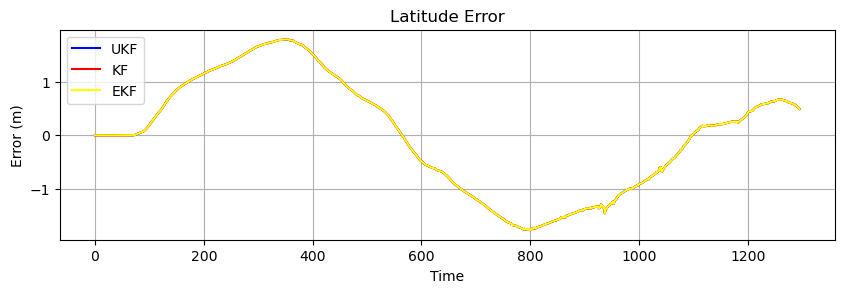

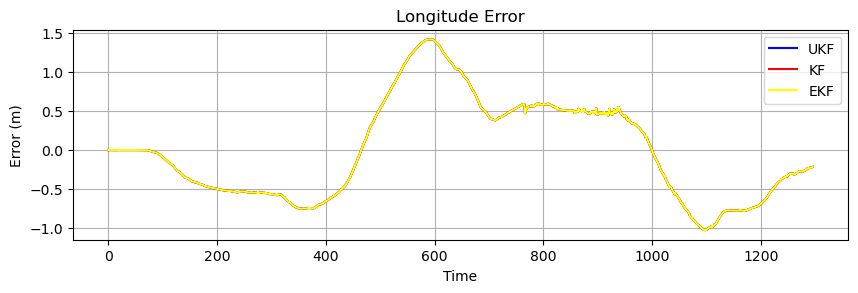

In [64]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(lat_error_ukf, label='UKF', color='blue')
plt.plot(lat_error_kf, label='KF', color='red')
plt.plot(lat_error_ekf, label='EKF', color='yellow')
plt.xlabel('Time')
plt.ylabel('Error (m)')
plt.title('Latitude Error')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(lon_error_ukf, label='UKF', color='blue')
plt.plot(lon_error_kf, label='KF', color='red')
plt.plot(lon_error_ekf, label='EKF', color='yellow')
plt.xlabel('Time')
plt.ylabel('Error (m)')
plt.title('Longitude Error')
plt.legend()
plt.grid(True)
plt.show()




## RMSE Calculation using coordinates

In [65]:
import numpy as np

# Function to calculate RMSE
def rmse(predictions, targets):
    return np.sqrt(np.mean((predictions - targets) ** 2))

# Calculate RMSE for Kalman Filter
rmse_kf = rmse(np.array(filtered_latitudes_kf), np.array(latitudes)) + rmse(np.array(filtered_longitudes_kf), np.array(longitudes))
print("RMSE for Kalman Filter:", rmse_kf)

# Calculate RMSE for Extended Kalman Filter
rmse_ekf = rmse(np.array(filtered_latitudes_ekf), np.array(latitudes)) + rmse(np.array(filtered_longitudes_ekf), np.array(longitudes))
print("RMSE for Extended Kalman Filter:", rmse_ekf)

# Calculate RMSE for Unscented Kalman Filter
rmse_ukf = rmse(np.array(filtered_latitudes_ukf), np.array(latitudes)) + rmse(np.array(filtered_longitudes_ukf), np.array(longitudes))
print("RMSE for Unscented Kalman Filter:", rmse_ukf)


RMSE for Kalman Filter: 1.4400119138942951e-05
RMSE for Extended Kalman Filter: 1.4400119138913061e-05
RMSE for Unscented Kalman Filter: 1.4400119112048459e-05


## RMSE Calculations using meters Conversion

In [66]:
import numpy as np

# Function to calculate RMSE
def rmse(predictions, targets):
    return np.sqrt(np.mean((predictions - targets) ** 2))

# Calculate RMSE for Kalman Filter
rmse_kf = rmse(np.array(estimated_latitudes_meters_kf), np.array(original_latitudes_meters_kf)) + rmse(np.array(estimated_longitudes_meters_kf), np.array(original_longitudes_meters_kf))
print("RMSE for Kalman Filter:", rmse_kf)

# Calculate RMSE for Extended Kalman Filter
rmse_ekf = rmse(np.array(estimated_latitudes_meters_ekf), np.array(original_latitudes_meters_ekf)) + rmse(np.array(estimated_longitudes_meters_ekf), np.array(original_longitudes_meters_ekf))
print("RMSE for Extended Kalman Filter:", rmse_ekf)

# Calculate RMSE for Unscented Kalman Filter
rmse_ukf = rmse(np.array(estimated_latitudes_meters_ukf), np.array(original_latitudes_meters_ukf)) + rmse(np.array(estimated_longitudes_meters_ukf), np.array(original_longitudes_meters_ukf))
print("RMSE for Unscented Kalman Filter:", rmse_ukf)

RMSE for Kalman Filter: 1.7049731255686957
RMSE for Extended Kalman Filter: 1.7049731255664224
RMSE for Unscented Kalman Filter: 1.704973127311207


## RMSE Of individual coordinates

In [67]:
import numpy as np

def calculate_rms(vector):
    squared_sum = np.sum(np.array(vector) ** 2)
    n = len(vector)
    rms = np.sqrt(squared_sum / n)
    return rms

# Example usage:
print(type(filtered_latitudes_kf))
print(type(filtered_latitudes_ekf))

# Convert lists to numpy arrays
latitudes_array = np.array(latitudes)
filtered_latitudes_kf_array = np.array(filtered_latitudes_kf)
filtered_latitudes_ekf_array = np.array(filtered_latitudes_ekf)
filtered_latitudes_ukf_array = np.array(filtered_latitudes_ukf)

rms_org_lat = calculate_rms(latitudes_array)
print(f"RMS_org_lat: {rms_org_lat}")

rms_kf_lat = calculate_rms(filtered_latitudes_kf_array)
print(f"RMS_kf_lat: {rms_kf_lat}")

rms_ekf_lat = calculate_rms(filtered_latitudes_ekf_array)
print(f"RMS_ekf_lat: {rms_ekf_lat}")

rms_ukf_lat = calculate_rms(filtered_latitudes_ukf_array)
print(f"RMS_ukf_lat: {rms_ukf_lat}")


<class 'list'>
<class 'list'>
RMS_org_lat: 17.601893560713865
RMS_kf_lat: 17.601893403520283
RMS_ekf_lat: 17.601893403520254
RMS_ukf_lat: 17.601893403520265


## RMSE of converted meters

In [68]:
import numpy as np

def calculate_rms(vector):
    squared_sum = np.sum(np.array(vector) ** 2)
    n = len(vector)
    rms = np.sqrt(squared_sum / n)
    return rms

# Example usage:
print(type(filtered_latitudes_kf))
print(type(filtered_latitudes_ekf))

# Convert lists to numpy arrays
latitudes_array = np.array(original_latitudes_meters_kf)
filtered_latitudes_kf_array = np.array(estimated_latitudes_meters_kf)
filtered_latitudes_ekf_array = np.array(estimated_latitudes_meters_ekf)
filtered_latitudes_ukf_array = np.array(estimated_latitudes_meters_ukf)

rms_org_lat = calculate_rms(latitudes_array)
print(f"RMS_org_lat: {rms_org_lat}")

rms_kf_lat = calculate_rms(filtered_latitudes_kf_array)
print(f"RMS_kf_lat: {rms_kf_lat}")

rms_ekf_lat = calculate_rms(filtered_latitudes_ekf_array)
print(f"RMS_ekf_lat: {rms_ekf_lat}")

rms_ukf_lat = calculate_rms(filtered_latitudes_ukf_array)
print(f"RMS_ukf_lat: {rms_ukf_lat}")



<class 'list'>
<class 'list'>
RMS_org_lat: 1959442.7911786672
RMS_kf_lat: 1959442.773679878
RMS_ekf_lat: 1959442.7736798748
RMS_ukf_lat: 1959442.773679876
